# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].str.extract('(\d+)')

In [5]:
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype('int64')

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
# Your code here:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('fifa["ValueNumeric"] ~ C(fifa["Position"])\
+ C(fifa["Preferred Foot"])', data = fifa).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
display(anova_table_1)
print(anova_table_1['PR(>F)'][0] < 0.05)
print(anova_table_1['PR(>F)'][1] < 0.05)

,sum_sq,df,F,PR(>F)
"C(fifa[""Position""])",8.781574e+06,26.0,4.034803,2.119345e-11
"C(fifa[""Preferred Foot""])",7.258024e+04,1.0,0.867045,3.517870e-01
Residual,1.516739e+09,18119.0,NaN,NaN


True
False


What is your conclusion from this ANOVA?

`Las diferentes posición de los jugadores sí afecta en el precio medio de los jugadores.
El píe con el que jueguen los jugadores NO afecta en el precio medio de los jugadores.`

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:
model = smf.ols('fifa["ValueNumeric"] ~ C(fifa["Nationality"])', data = fifa).fit()
anova_table_2 = sm.stats.anova_lm(model, typ=2)
display(anova_table_2)
print(anova_table_2['PR(>F)'][0] < 0.05)

,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",4.299134e+07,163.0,3.20523,1.747201e-38
Residual,1.484715e+09,18043.0,NaN,NaN


True


What is your conclusion from this ANOVA?

`Las nacionalidad de los jugadores sí afecta en el precio medio de los jugadores.`

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [8]:
# Your code here:

fifa.isnull().sum()*100/len(fifa)

Name              0.000000
Age               0.000000
Nationality       0.000000
Overall           0.000000
Potential         0.000000
Club              1.323667
Value             0.000000
Preferred Foot    0.263635
Position          0.329544
Weak Foot         0.263635
Acceleration      0.263635
SprintSpeed       0.263635
Stamina           0.263635
Strength          0.263635
LongShots         0.263635
Aggression        0.263635
Interceptions     0.263635
Positioning       0.263635
Vision            0.263635
Penalties         0.263635
ValueNumeric      0.000000
dtype: float64

In [9]:
fifa_clean = fifa.dropna()

In [10]:
fifa_clean.isnull().sum()*100/len(fifa)

Name              0.0
Age               0.0
Nationality       0.0
Overall           0.0
Potential         0.0
Club              0.0
Value             0.0
Preferred Foot    0.0
Position          0.0
Weak Foot         0.0
Acceleration      0.0
SprintSpeed       0.0
Stamina           0.0
Strength          0.0
LongShots         0.0
Aggression        0.0
Interceptions     0.0
Positioning       0.0
Vision            0.0
Penalties         0.0
ValueNumeric      0.0
dtype: float64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [42]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [57]:
x = fifa_clean[['SprintSpeed','Stamina']]
y = fifa_clean['ValueNumeric']

linear_regress = LinearRegression()
linear_regress.fit(x,y)
y_pred = linear_regress.predict(x)
X, Y = sm.add_constant(x.values), np.array([[i] for i in y.values])
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.498
Date:                Thu, 26 Mar 2020   Prob (F-statistic):             0.0111
Time:                        22:48:15   Log-Likelihood:            -1.2703e+05
No. Observations:               17918   AIC:                         2.541e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.4959     10.394     26.987      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [47]:
# Your conclusions here:


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [12]:
# Your code here:
x = fifa_clean[['SprintSpeed','Stamina']]
y = fifa_clean['Potential']

linear_regress = LinearRegression()
linear_regress.fit(x,y)
y_pred = linear_regress.predict(x)


X, Y = sm.add_constant(x.values), np.array([[i] for i in y.values])
model = sm.OLS(Y, X).fit()

print(model.summary())


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

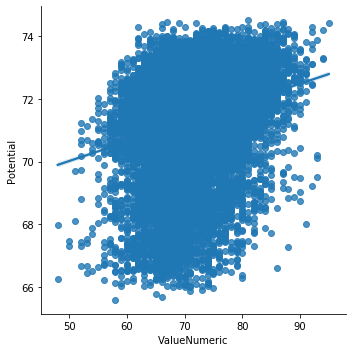

In [53]:
# Your code here:
import seaborn as sns
sns.lmplot('ValueNumeric','Potential', data =  pd.DataFrame({'ValueNumeric': y, 'Potential': y_pred}))


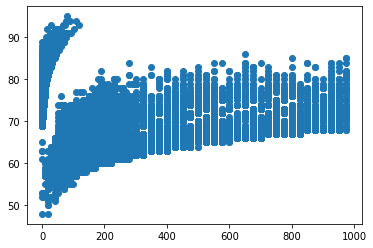

In [56]:
plt.scatter(fifa_clean['ValueNumeric'],fifa_clean['Potential'])